In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os,shutil
import imutils
import matplotlib.image as mpimg
from sklearn.utils import shuffle

### EDA

In [2]:
brain_tumor_dataset_tumorous="brain_tumor_dataset/Tumorous/"
brain_tumor_dataset_non_tumorous='brain_tumor_dataset/Non-Tumorous/'
tumor=len(os.listdir(brain_tumor_dataset_tumorous))
nonTumor=len(os.listdir(brain_tumor_dataset_non_tumorous))
print(tumor,nonTumor)

155 98


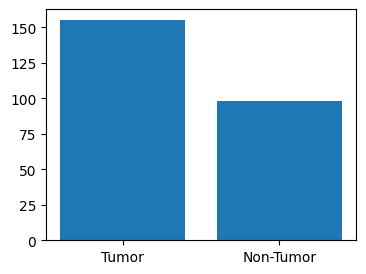

In [3]:
data={
    'Tumor':tumor,
    "Non-Tumor":nonTumor
}
types=data.keys()
values=data.values()

# plot a bar plot
plt.figure(figsize=(4,3))
plt.bar(types,values)
plt.show()

Observation:From the above chart our dataset is imbalanced.

In [8]:
# Rename Image names
i=0
for filename in os.listdir(brain_tumor_dataset_tumorous):
    old_name=brain_tumor_dataset_tumorous+filename
    new_name=brain_tumor_dataset_tumorous+'Y_'+str(i)+'.jpg'
    os.rename(old_name,new_name)
    i+=1
print('File renamed successfully.')

File renamed successfully.


In [9]:
#  Rename Image names
i=0
for filename in os.listdir(brain_tumor_dataset_non_tumorous):
    old_name=brain_tumor_dataset_non_tumorous+filename
    new_name=brain_tumor_dataset_non_tumorous+'N_'+str(i)+'.jpg'
    os.rename(old_name,new_name)
    i+=1
print('File renamed successfully.')

File renamed successfully.


### Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Augmented image generated function
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir+ filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [7]:
augmented_dataset_tumorous="augmented_dataset/Tumorous/"
augmented_dataset_non_tumorous="augmented_dataset/Non-Tumorous/"
os.makedirs(augmented_dataset_tumorous, exist_ok=True)
os.makedirs(augmented_dataset_non_tumorous, exist_ok=True)

print("Folder created successfully")

Folder created successfully


In [10]:
augmented_data(brain_tumor_dataset_tumorous,6,augmented_dataset_tumorous)
augmented_data(brain_tumor_dataset_non_tumorous,9,augmented_dataset_non_tumorous)

In [11]:
tumor=len(os.listdir(augmented_dataset_tumorous))
nonTumor=len(os.listdir(augmented_dataset_non_tumorous))
print(tumor,nonTumor)

1085 980


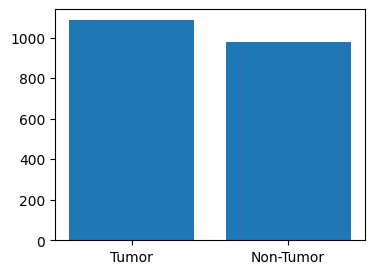

In [12]:
data={
    'Tumor':tumor,
    "Non-Tumor":nonTumor
}
types=data.keys()
values=data.values()

# plot a bar plot
plt.figure(figsize=(4,3))
plt.bar(types,values)
plt.show()

### Image Preprocessing

In [13]:
def crop_brain_tumor_img(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

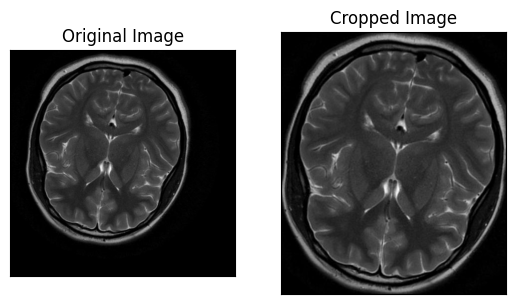

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
img=cv2.imread("augmented_dataset/Non-Tumorous/aug_N_0_0_1747.jpg")
crop_brain_tumor_img(img,plot=True)

In [16]:
# crop image for better predication
for filename in os.listdir(augmented_dataset_tumorous):
    img = cv2.imread(augmented_dataset_tumorous + filename)
    img = crop_brain_tumor_img(img, False)
    cv2.imwrite(augmented_dataset_tumorous + filename, img)

for filename in os.listdir(augmented_dataset_non_tumorous):
    img = cv2.imread(augmented_dataset_non_tumorous + filename)
    img = crop_brain_tumor_img(img, False)
    cv2.imwrite(augmented_dataset_non_tumorous + filename, img)

### Spliting the data into Training,Testing and Validation

In [17]:
os.makedirs('Tumorous_nonTumorous/train')
os.makedirs('Tumorous_nonTumorous/test')
os.makedirs('Tumorous_nonTumorous/validation')
print("file created successfully.")

file created successfully.


In [ ]:
os.makedirs('Tumorous_nonTumorous/train/Tumor')
os.makedirs('Tumorous_nonTumorous/train/Non-Tumor')
os.makedirs('Tumorous_nonTumorous/test/Tumor')
os.makedirs('Tumorous_nonTumorous/test/Non-Tumor')
os.makedirs('Tumorous_nonTumorous/validation/Non-Tumor')
os.makedirs('Tumorous_nonTumorous/validation/Tumor')

In [ ]:
fname_tumor=[]
for filename in os.listdir(augmented_dataset_tumorous):
    fname_tumor.append(filename)
print(len(fname_tumor))

# Training dataset 
for i in range(0,800):
    source=augmented_dataset_tumorous+fname_tumor[i]
    destination='Tumorous_nonTumorous/train/Tumor/'+fname_tumor[i]
    shutil.copy(source,destination)

# Testing dataset
for i in range(800,940):
    source=augmented_dataset_tumorous+fname_tumor[i]
    destination='Tumorous_nonTumorous/test/Tumor/'+fname_tumor[i]
    shutil.copy(source,destination)
    
# validation dataset
for i in range(940,1085):
    source=augmented_dataset_tumorous+fname_tumor[i]
    destination='Tumorous_nonTumorous/validation/Tumor/'+fname_tumor[i]
    shutil.copy(source,destination)

In [28]:
fname_nonTumor=[]
for filename in os.listdir(augmented_dataset_non_tumorous):
    fname_nonTumor.append(filename)
print(len(fname_nonTumor))

# Training dataset
for i in range(0,700):
    source=augmented_dataset_non_tumorous+fname_nonTumor[i]
    destination='Tumorous_nonTumorous/train/Non-Tumor/'+fname_nonTumor[i]
    shutil.copy(source,destination)

# Testing dataset
for i in range(700,840):
    source=augmented_dataset_non_tumorous+fname_nonTumor[i]
    destination='Tumorous_nonTumorous/test/Non-Tumor/'+fname_nonTumor[i]
    shutil.copy(source,destination)
    
# validation dataset
for i in range(840,980):
    source=augmented_dataset_non_tumorous+fname_nonTumor[i]
    destination='Tumorous_nonTumorous/validation/Non-Tumor/'+fname_nonTumor[i]
    shutil.copy(source,destination)

980
